<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.datasets import load_iris

%matplotlib inline

In [2]:
# identify the path
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [3]:
# reading the data
sac_df = pd.read_csv(sac_csv)

In [4]:
# study the dataframe
sac_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [5]:
# get familiar to our data
sac_df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [6]:
# look at the shape of data
sac_df.shape

(985, 12)

In [7]:
# checking if the types of data does not fit the column description
sac_df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [8]:
# checking if there are any missing values, looks like there are no missing values in the dataset
sac_df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

#### The dataset looks complete to me, we are going to dig in to see what relationship we have within the variables

In [9]:
#I want to change the sq__ft to one underscore instead of two, easier to navigate
#df=df.rename(columns = {'two':'new_name'})
sac_df = sac_df.rename(columns = {'sq__ft':'sq_ft'})

In [10]:
# identify the index 703's price and sq__ft is negative
sac_df.sort_values(by = 'sq_ft')

,street,city,zip,state,beds,baths,sq_ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433
492,2513 OLD KENMARE RD,LINCOLN,95648,CA,5,3,0,Residential,Mon May 19 00:00:00 EDT 2008,304000,38.847396,-121.259586
559,40 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884535,-121.289619
558,36 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884599,-121.289406
557,32 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884741,-121.289390
556,28 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884936,-121.289397
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
555,24 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885132,-121.289405
554,20 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885327,-121.289412
545,1732 TUSCAN GROVE CIR,ROSEVILLE,95747,CA,5,3,0,Residential,Mon May 19 00:00:00 EDT 2008,520000,38.796683,-121.342555


In [11]:
# fixing the error, the original sq_ft is negative integer
sac_df.loc[sac_df['sq_ft'] < 0,['sq_ft']] = 984

In [12]:
# fixing the error, the orignal price is negative integer
sac_df.loc[sac_df['price'] < 0,['price']] = 210944

In [13]:
# fixing the switching data 
sac_df.loc[sac_df['latitude'] < 0,['latitude']] = 121.503471

In [14]:
# converting the zip code as object for future analysis use
sac_df['zip'] = sac_df['zip'].apply(lambda x: str(x))

In [15]:
#check to see if the change load into dataset
sac_df.loc[703]

street                   1900 DANBROOK DR
city                           SACRAMENTO
zip                                 95835
state                                  AC
beds                                    1
baths                                   1
sq_ft                                 984
type                                Condo
sale_date    Fri May 16 00:00:00 EDT 2008
price                              210944
latitude                          121.503
longitude                         38.6684
Name: 703, dtype: object

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

#### From the heatmap below, I can see the correlation within 'beds','bath', 'sq_ft' and 'price are having positive correlation. Since 'beds', and 'baths' are including in the 'sq_ft', thus, I will pick sq_ft as a valid potential predictor in an SLR model. 
#### - 'sq_ft': independent variable
#### - 'price': dependent variable

In [16]:
#saving the cleaning dataset as shd and export it as csv format to my folder.
shd = sac_df

In [17]:
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

In [18]:
shd.describe()

,beds,baths,sq_ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1314.916751,234144.263959,38.691829,-121.193371
std,1.307932,0.895371,853.048243,138365.839085,2.645280,5.100670
min,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695677,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,121.503471,38.668433


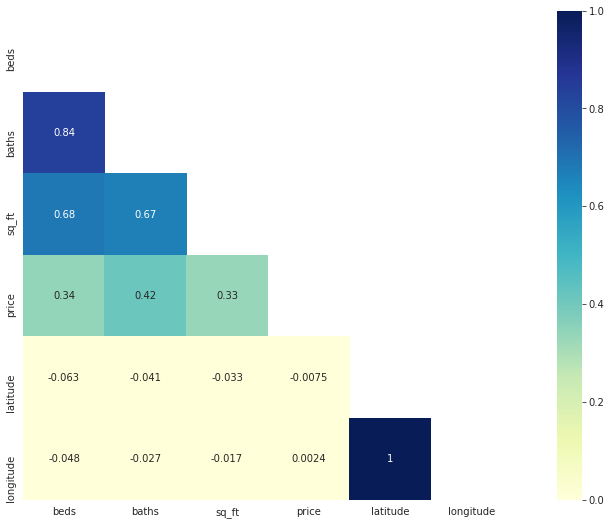

In [19]:
# plotting the heatmap for all variables to check their correlation scores
plt.figure(figsize=(16, 9))

corr = shd[['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq_ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude']].corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask , vmin=0, vmax=1, square=True, cmap = 'YlGnBu', annot=True)

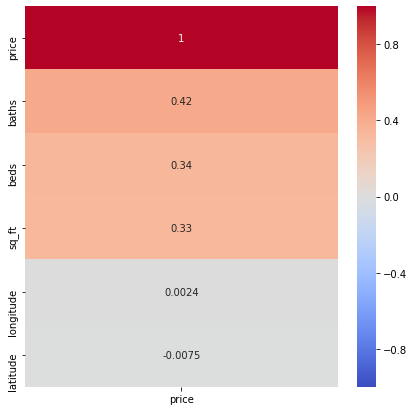

In [20]:
# just want to check the target variable 'price' vs all other variables
plt.figure(figsize = (7,7))
sns.heatmap(sac_df.corr()[['price']].sort_values('price', ascending = False),
            annot = True,
            cmap ='coolwarm', vmin=-1)

In [21]:
# from the pairlot, I found some outliers which drive some of plots in pairlot looks odd, so I fixed:
# the data on one of row, its data in latitude and longitude were switch

sac_df.loc[sac_df['latitude'] >39,['latitude']] = 38.668433

In [22]:
#fixing the switching data
sac_df.loc[sac_df['longitude'] == 38.668433,['longitude']] = 121.503471

In [23]:
#fixing the switching data
sac_df.loc[sac_df['longitude'] == 121.503471,['longitude']] = -121.503471

In [24]:
# update the clean data to shd again
shd = sac_df

In [25]:
# export the clean data to our folder agian
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')

/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


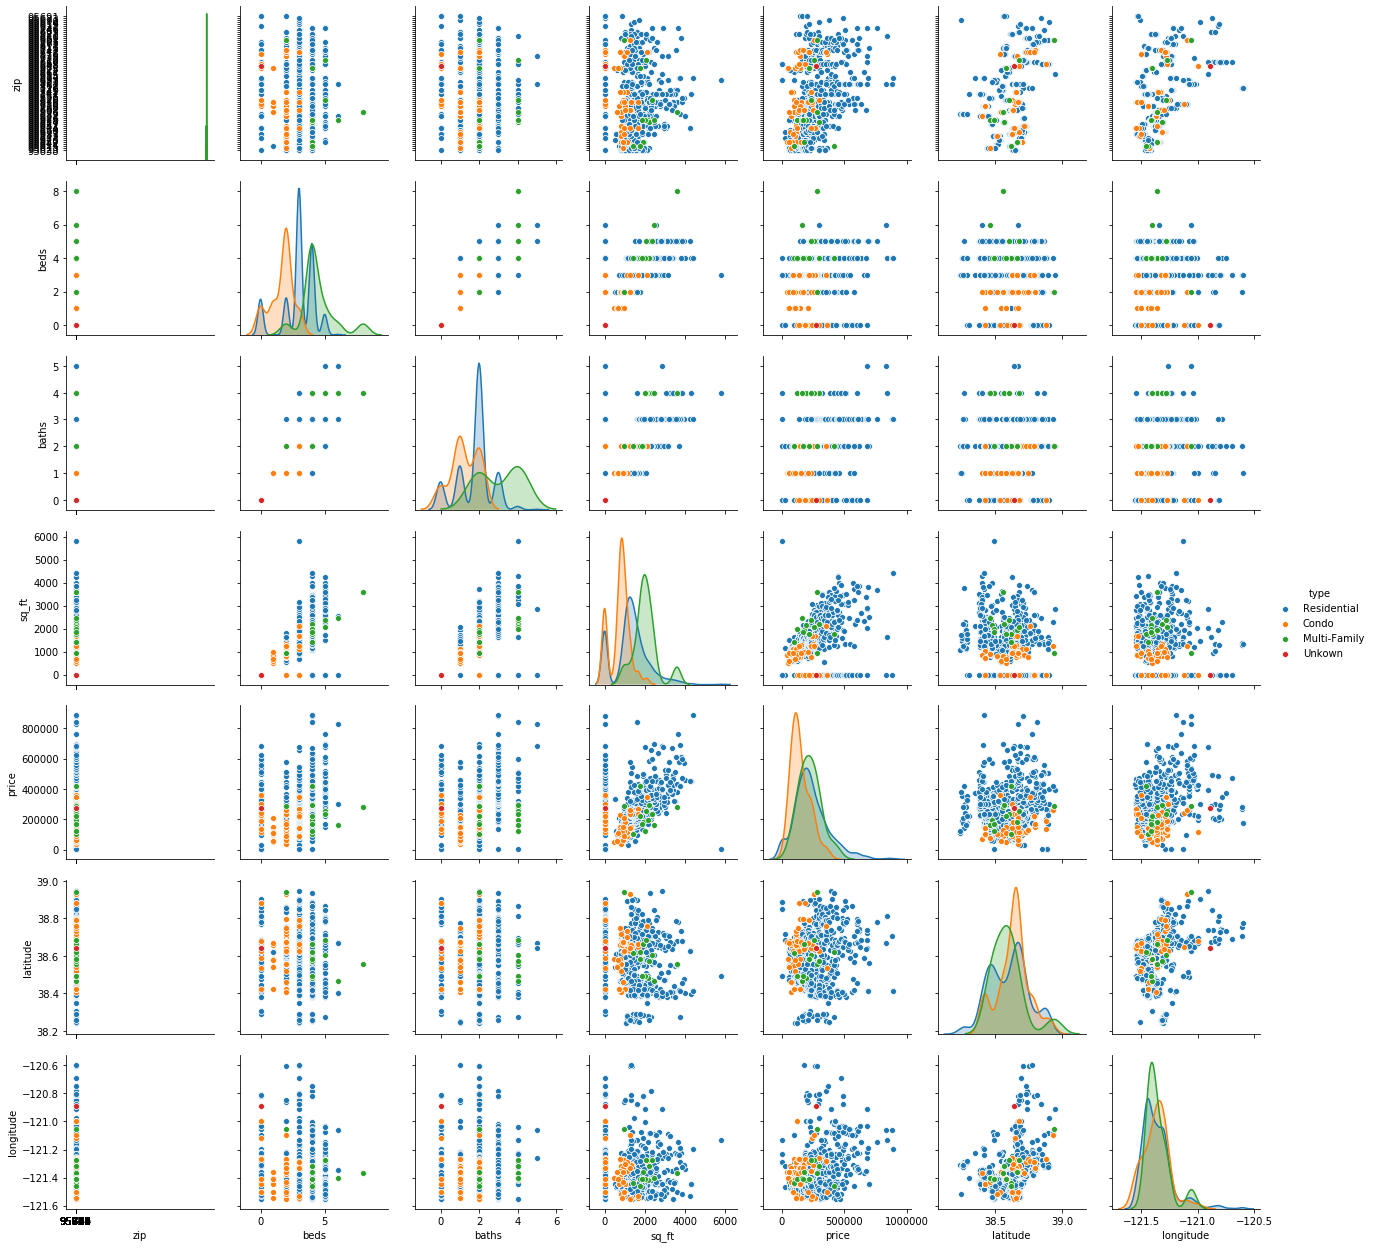

In [26]:
# plot the pairlot for all variables to see their relationship with our dependent variable 'price'
sns.pairplot(shd, hue='type');

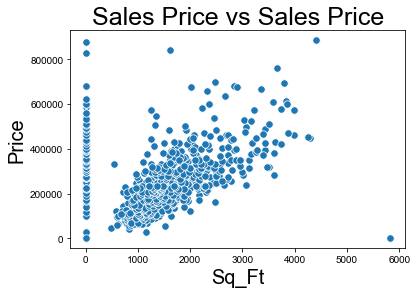

In [27]:
# plotting our the relatinship between sq_ft and price, it looks like they do have positive relationship.
# y axis is our target and x axis is the independent variable.

ax = sns.scatterplot(shd['sq_ft'], shd['price'], s = 55)
ax.set_xlabel('Sq_Ft', fontsize = 20)
ax.set_ylabel('Price',fontsize = 20)
plt.title('Sales Price vs Sales Price', fontsize = 25);
sns.set(rc={'figure.figsize':(11.7,8.27)})

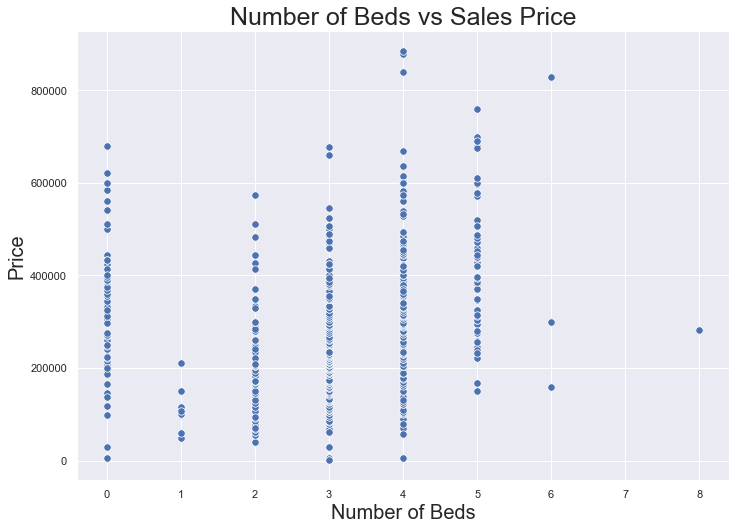

In [28]:
# plotting our the relatinship between beds and price, it looks like they do not have any relationship yet.
ax = sns.scatterplot(shd['beds'], shd['price'], s = 55)
ax.set_xlabel('Number of Beds', fontsize = 20)
ax.set_ylabel('Price',fontsize = 20)
plt.title('Number of Beds vs Sales Price', fontsize = 25);
sns.set(rc={'figure.figsize':(11.7,8.27)})

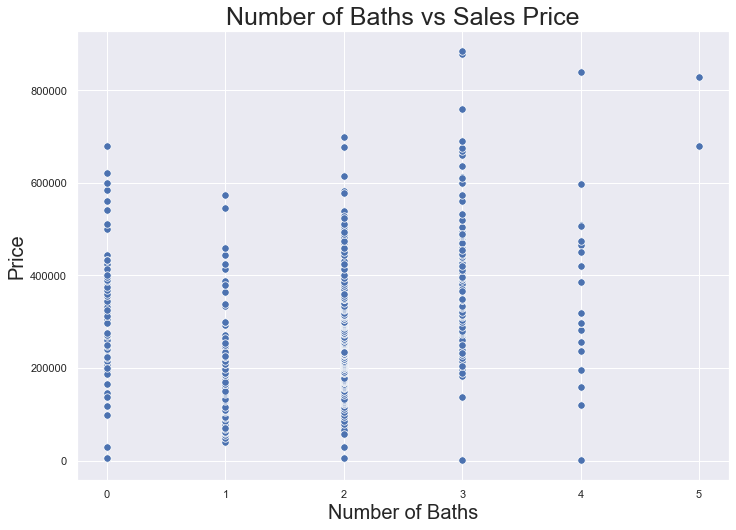

In [29]:
# plotting our the relatinship between baths and price, it looks like they do not have any relationship yet. 
ax = sns.scatterplot(shd['baths'], shd['price'], s = 55)
ax.set_xlabel('Number of Baths', fontsize = 20)
ax.set_ylabel('Price',fontsize = 20)
plt.title('Number of Baths vs Sales Price', fontsize = 25);
sns.set(rc={'figure.figsize':(11.7,8.27)})

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

#### A: I think the sq_ft will be the best predictor of Y in an SLR Model. Because from the above scatterplots, 
#### I can see there is a postive slope between the square footage. However, when we look at the relationship between
#### number of baths and number of beds against sales price, it makes sense that more baths or bed the price go up. 

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [30]:
### Manual version:
##1 ---> Set up  X and y variables.
# y = shd['price'] # y = what we want to predict
# X = shd[['sq_ft']] # X = what we use to predict y
## 2---> First, we instantiate our model.
# model = LinearRegression()
## 3 ---> Next, we fit our model to our data.
# model.fit(X, y)
## 4.---> Calculate the value of beta_0 which is our intercept
# model.intercept_ 
## 5. --- > Calculate the value of beta_1 which is our slope, the impact on each unit change on the varible
# model.coef_


In [31]:
from sklearn.metrics import r2_score

In [39]:
# SLR : SQ_FT VS PRICE
# by walking through the manual version, then I built a function to get the intercept and slope for SLR
def slope_intercept(df, X_column, y_column):
    y = df[X_column]
    X = df[[y_column]]
    model = LinearRegression()
    model.fit(X,y)
    y_pred = model.predict(X)
    r_square = r2_score(y,y_pred)
    return [r_square, model.intercept_, model.coef_[0]] 

In [40]:
print(slope_intercept(shd,'price', 'sq_ft'))

[0.11148717682951437, 162930.16140699777, 54.158639688530734]


In [34]:
# The R2 is 0.11 which is relative low and it indicates that our model is not great.

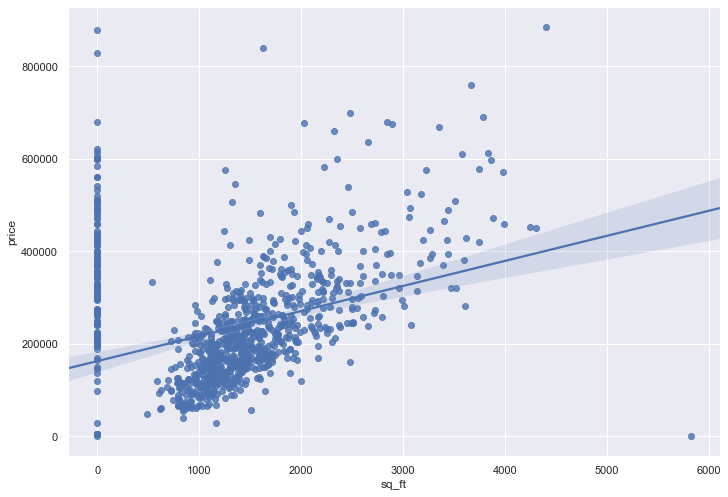

In [35]:
sns.regplot(x="sq_ft", y="price", data=shd)

### 6. Interpret the intercept. Interpret the slope.

In [41]:
# I am using the sq_ft as my predictor on price of the house. I got 162,930 as my intercept and 54 as my slope.
# For the intercept, it means that when the sq_ft is 0, we will be still paying $162,930 for the lot, 
# but in the reality,
# if the sq_ft is 0, it means either the lot does not exist or our data is has some bad data.
# for the sloep, it means that when the sq_ft is increase by 1 sq_ft, the sales price will be incresed by $54. 

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [42]:
# An example for prediction
# --> We can use this model to predict how much we can list our house determinded by the size of the house (sq_ft)
# for example if we have a house is 2000 sq.ft, we can use this model to predict how much the sales price is in order
# to decide our list price.(and we can use model.predict to make the prediction on price)

# An example for inference
# --> Let's say we want to sell our house and before that, we would like to remodel it by add more sq_ft on the house. 
# by using this model, we can see the impact on price by changing the sq_ft which is our slope. By predicting how much
#  it will be increased in the price, we can budget remodeling cost better.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

From the residuals plot below, we can see houses are less than 2000 sq ft and tend to be 

In [43]:
model = LinearRegression()
model.fit(shd[['sq_ft']],shd['price'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
y_pred = model.predict(shd[['sq_ft']])
residuals = shd['price'] - y_pred

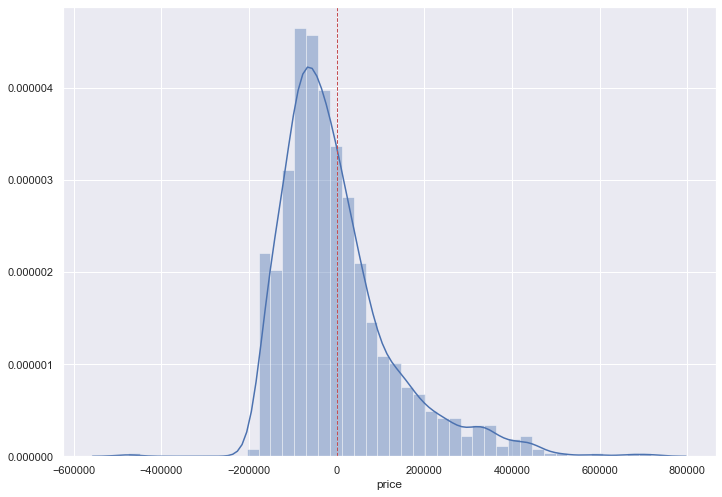

In [45]:
# I want to check if the residual is normal distributed.
# It is almost normal distributed
sns.distplot(residuals)
plt.axvline(residuals.mean(), color='r', linestyle='--', linewidth=1)

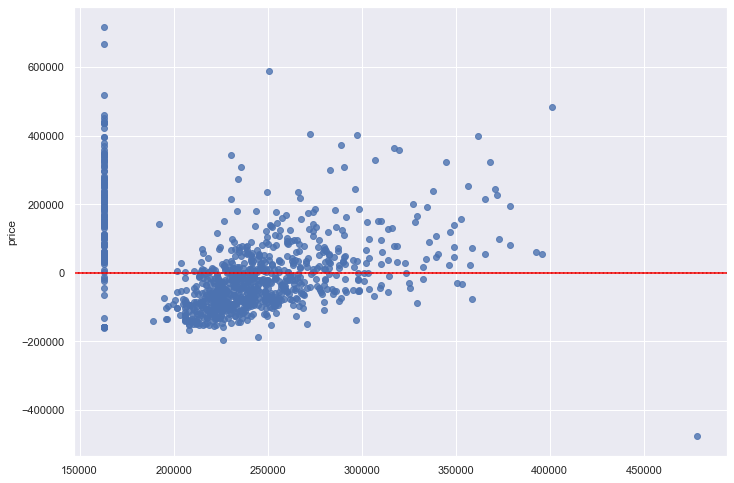

In [46]:
sns.residplot(x = y_pred, y = residuals)
plt.axhline(0, color='red')

# most of the residuals falls between 200,000 and 400,000 for the hosue less than 2000 sq ft.
# Overshoot for the smaller sq_ft house and undershoot for the bigger size house
# not a good residual plot because we can see the residual is not equalyly spread out.

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [47]:
# #pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False,drop_first=False,dtype=None,)
# shd['type'], shd[['type']]
shd = pd.get_dummies(shd, columns=['type'])

---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [48]:
# drop column 'type_Unkown'
shd.drop(columns=['type_Unkown'], inplace = True)

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [49]:
# take three independent veraibles: baths, sq_ft and type_residential to build the MLR model
y = shd['price']
feature= shd[['baths','sq_ft','type_Residential']]

In [50]:
# Instantiate our model.
model = LinearRegression()

In [51]:
# fit the model
model.fit(feature, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
# getting yhat for MLR models
y_pred_mlr = model.predict(feature)

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

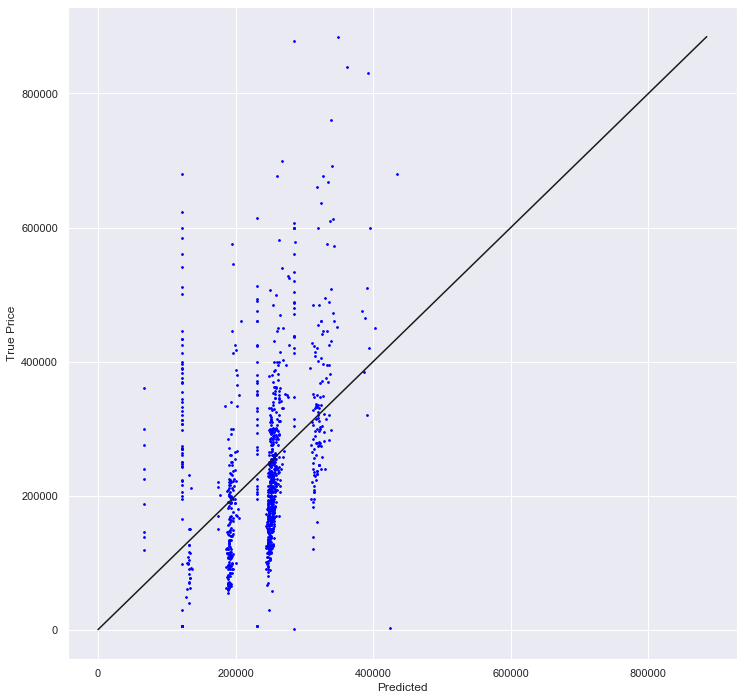

In [53]:
plt.figure(figsize=(12,12))

# Generate a scatterplot of predicted values versus actual values.(plt.scatter(x axis, y axis, s =, c =))
plt.scatter(y_pred_mlr, y, s =3, c ='blue');
plt.xlabel("Predicted")
plt.ylabel("True Price")

plt.plot([0, np.max(y)], [0, np.max(y)], c='k');

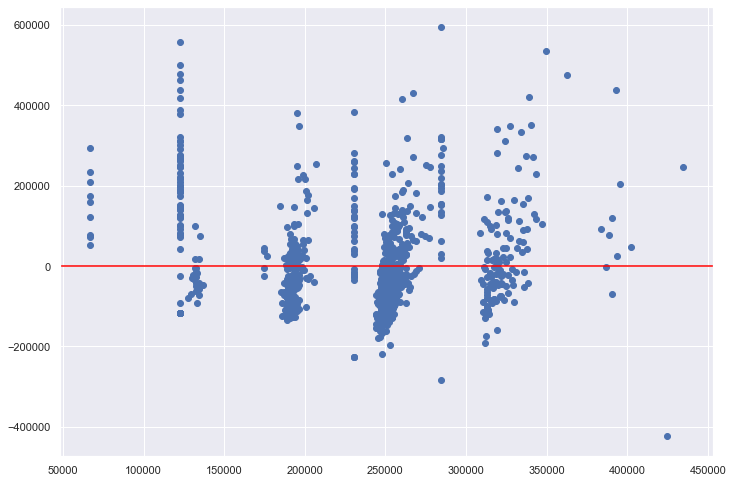

In [54]:
#Residual plot
resids = y - y_pred_mlr

plt.scatter(y_pred_mlr, resids) # axis x, axis y
plt.axhline(0, color='red')


In [55]:
model.coef_
# As increasing a bath, price is expected to increase by $5, holding all other variables constant.
# As increasing 1 sq_ft in house, price is expected to increase by $1.5, holding all other variables constant.
# If your house is condo type, price is expected to decrease by $5 compare to other type,
# holding all other variables constant.

array([5.39960682e+04, 1.47243614e+01, 5.61955177e+04])

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [56]:
# I believe that they don't meet my model.
# 1. by looking at the distribution of the residuals, it is skewed to right.
# so it is not normally distributed which does not meeet Normality criteria.
# 2. 

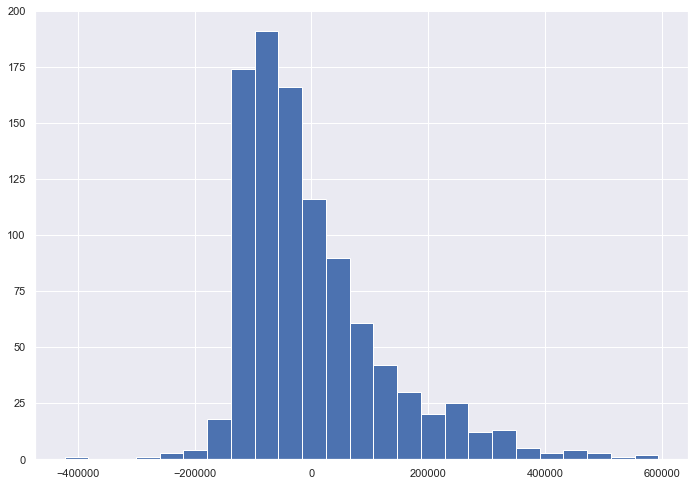

In [57]:
resids.hist(bins=25)

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [58]:
import statsmodels.api as sm

In [59]:
model = sm.OLS(y,feature).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     1209.
Date:                Sun, 23 Jun 2019   Prob (F-statistic):               0.00
Time:                        00:40:27   Log-Likelihood:                -12962.
No. Observations:                 985   AIC:                         2.593e+04
Df Residuals:                     982   BIC:                         2.594e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
baths             6.144e+04   5695.623  

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [60]:
def r2_adj(y, features):
    model = LinearRegression()
    model.fit(features, y)
    y_pred_mlr = model.predict(features)
    SS_residuals = sum((y-y_pred_mlr)**2)
    SS_total = sum((y-np.mean(y))**2)
    r_squared = 1-(float(SS_residuals))/SS_total
    r2_adj = 1-(1-r_squared)*(len(y)-1)/(len(y)-features.shape[1]-1)
    return r_squared, r2_adj

In [61]:
from sklearn import metrics

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [62]:
## 1Mean Absolute Error (MAE)
# metrics.mean_absolute_error(y, predictions)

## 2 neg_mean_squared_log_error’	
# mean_squared_log_error(y_true, y_pred, sample_weight=None, multioutput=’uniform_average)

## 3 Root Mean Squared Error (RMSE)
# metrics.root_mean_squared_error(y, predictions)

## 4 Mean Squared Error (MSE)
# metrics.mean_squared_error(y, predictions)

## 5𝑅2
# metrics.r2_score(y, predictions)

##6  ‘explained_variance’	explained_variance_score(y_true, y_pred, sample_weight=None, multioutput=’uniform_average
# metrics.explained_variance_score

def reg_metrics(true_y, y_predictions):
    print('These are the six regression mertic for above Model:')
    mae = round(metrics.mean_absolute_error(true_y, y_predictions),2)
    msle = round(metrics.mean_squared_log_error(true_y, y_predictions),2)
    rmse = round(np.sqrt(metrics.mean_squared_error(true_y,y_predictions)),2)
    mse = round(metrics.mean_squared_error(true_y,y_predictions),2)
    r2 = round(metrics.r2_score(true_y,y_predictions),2)
    explained_var = round(metrics.explained_variance_score(true_y,y_predictions),2)
    print('MAE: ', mae)
    print('MSLE: ', msle)
    print('RMSE:', rmse)
    print('MSE: ', mse)
    print('R_2 Square: ', r2)
    print('Explained Variance Score: ', explained_var)
    return
    

In [63]:
reg_metrics(y,y_pred_mlr)

These are the six regression mertic for above Model:
MAE:  93471.12
MSLE:  0.84
RMSE: 124502.15
MSE:  15500786340.58
R_2 Square:  0.19
Explained Variance Score:  0.19


### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [64]:
# checking variables: number of baths, sq_ft and if the property is residential, how will it impact on the price?
# I can see that the R2 score is 0.19 and R2_adjusted is 0.187 which is performing BETTER than only taking sq_Ft into 
# the account which is only 0.11 for R2 in the above SLR model. But overall, it is still not a good model.
r2_adj(shd['price'],shd[['baths','sq_ft','type_Residential']])

(0.18952970865246177, 0.18705120623243876)

In [65]:
# checking variables: number of beds, sq_ft and if the property is residential, how will it impact on the price?
# I can see that the R2 score is 0.143 and R2_adjusted is 0.14 which is performing WORSER than above.
# From the score after we took out number of baths, our scores are decreased. Thus, the number of beds might not be an
# important factor compare to number of baths on predicting the price of the property.
r2_adj(shd['price'], shd[['sq_ft','beds','type_Residential']])

(0.14263613598999159, 0.14001422814898234)

In [66]:
# checking variables: zip, sq_ft and if the property is residential, how will it impact on the price?
# I can see that the R2 score is 0.1339 and R2_adjusted is 0.136 which is performing WORSER than above.
# From the score after we took out number of beds, our scores are decreased. Thus, zip might not be an
# important factor compare to number of beds on predicting the price of the property. 
# But I believe this needs more data other than just zip code since it will relate to the income, crime rate or 
# school rate. And our dataset does not have such information, Thus, we need to perform further data collection.
r2_adj(shd['price'], shd[['sq_ft','zip','type_Residential']])

(0.13942227048864586, 0.1367905343127701)

In [67]:
# checking variables: baths, beds, sq_ft and if the property is residential, how will it impact on the price?
# I can see that the R2 score is 0.193 and R2_adjusted is 0.189 which is performing BETTER than above
# From the score after we took out ZIP, our scores are increase dramatically by comparing above. Thus,  
# baths , sq_ft and bedds are sure good variables to keep in our model on be an on predicting the price of the property. 
r2_adj(shd['price'], shd[['baths','sq_ft','beds','type_Residential']])

(0.19282701927108303, 0.1895324356762711)

In [68]:
# let's check zip, baths, and sq_ft and see if the property is residential, how will it impact on the price?
# I can see that the R2 score is 0.2.06 and R2_adjusted is 0.203 which is performing BETTER than above
# From the score after we took out beds, our scores are increase slightly by comparing above. Thus,  
# zip might a good variable to keep but it has to depend on the number of baths or sq_Ft
r2_adj(shd['price'], shd[['baths', 'sq_ft','zip','type_Residential']])

(0.20578044373065396, 0.20253873125608524)

In [69]:
# let's check zip, baths, beds and sq_ft and see if the property is residential, how will it impact on the price?
# I can see that the R2 score is 0.2.08 and R2_adjusted is 0.204 which is performing BETTER than above
# Therefore, I believe these four variables are important on predicting the price (zip has to gather more information)
r2_adj(shd['price'], shd[['baths','sq_ft','zip','beds','type_Residential']])

(0.20775698609629722, 0.2037108011427543)

In [70]:
# I want to check the six metrice of the last three evaluations we tried above
# Model 1 : baths, beds, type_Residential and beds
from sklearn.linear_model import LinearRegression
lr_1 = LinearRegression()
lr_1.fit(shd[["baths"]+["sq_ft"]+["type_Residential"]+['beds']], shd[["price"]])
predictions_1 = lr_1.predict(shd[["baths"]+["sq_ft"]+["type_Residential"]+['beds']])

import statsmodels.formula.api as sm
model_1 = sm.ols(formula='price ~ baths+sq_ft+type_Residential+beds', data=shd)
fitted1 = model_1.fit()


reg_metrics(y,predictions_1)


These are the six regression mertic for above Model:
MAE:  93353.88
MSLE:  0.86
RMSE: 124248.63
MSE:  15437723069.86
R_2 Square:  0.19
Explained Variance Score:  0.19


In [71]:
# Model 2 : 'baths', 'sq_ft','zip','type_Residential
lr_2 = LinearRegression()
lr_2.fit(shd[["baths"]+["sq_ft"]+['zip']], shd[["price"]])
predictions_2= lr_2.predict(shd[["baths"]+["sq_ft"]+['zip']])


model_2 = sm.ols(formula='price ~ baths+sq_ft+zip', data=shd)
fitted2 = model_2.fit()


reg_metrics(y,predictions_2)


These are the six regression mertic for above Model:
MAE:  92208.56
MSLE:  0.87
RMSE: 123971.74
MSE:  15368991697.81
R_2 Square:  0.2
Explained Variance Score:  0.2


In [72]:
# model 3 : 'baths','sq_ft','zip','beds','type_Residential'

lr_3 = LinearRegression()
lr_3.fit(shd[["baths"]+["sq_ft"]+['beds']+['zip']], shd[["price"]])
predictions_3 = lr_3.predict(shd[["baths"]+["sq_ft"]+['beds']+['zip']])

import statsmodels.formula.api as sm
model_3 = sm.ols(formula='price ~ baths+sq_ft+beds+zip', data=shd)
fitted3 = model_3.fit()


reg_metrics(y,predictions_3)



These are the six regression mertic for above Model:
MAE:  92128.83
MSLE:  0.87
RMSE: 123916.37
MSE:  15355265641.4
R_2 Square:  0.2
Explained Variance Score:  0.2


### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [73]:
from sklearn.model_selection import train_test_split,cross_val_score

In [74]:
X_train, X_test, y_train, y_test = train_test_split(shd[["baths"]+["sq_ft"]+['beds']+['zip']], 
                                                    shd["price"], random_state = 42)

In [75]:
X_train.head()

,baths,sq_ft,beds,zip
527,2,1744,4,95815
344,1,795,2,95842
854,3,3229,4,95630
25,2,1088,3,95843
84,3,2235,4,95829


In [76]:
X_train.shape

(738, 4)

In [77]:
X_test.shape

(247, 4)

In [78]:
lr_3.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
cross_val_score(lr_3, X_train, y_train, cv=5).mean()

0.17571229363397925

In [80]:
# checking model performance on our training set
lr_3.score(X_train, y_train)

0.20304677422659156

In [81]:
# checking model performance on our test set
lr_3.score(X_test, y_test)

0.16926517474048108

In [82]:
# Conclusion: After the cross validation and checking the scores on our training set and test set, I belive our model 
# is suffering high bias, because:
# 1. three of scores aren't performing good on our model overall because their scores aren't even close to 1.
# 2. the score on training set is 0.03 better than testing set. So I think the model is having high bias due to the 
# quality of data, our model is too simple for the data and it is underfit.